Autistic Spectrum Disorder Data for Children Data Set EDA
DSCI 8950
Sandra Lopez Padilla 

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

# Load Autistic Spectrum Disorder Screening Data for Children Data Set


The data set Autistic Spectrum Disorder Screening Data for Children is introduced by Fadi Fayez Thabtah from the Department of Digital Technology of the Manukau Institute of Technology in Auckland, New Zealand. The data set consists of 292 instances and 21 attributes. The data set recorded 10 behavioral features from the child version of the Autism Spectrum Quotient-10 (AQ-10-Child) screening test and 10 ASD related characteristics. 

AQ-10-Child screening test consists of the following questions:

1. S/he often notices small sounds when others do not
2. S/he usually concentrates more on the whole picture, rather than the small details
3. In a social group, s/he can easily keep track of several different people’s conversations
4. S/he finds it easy to go back and forth between different activities
5. S/he doesn’t know how to keep a conversation going with his/her peers
6. S/he is good at social chit-chat
7. When s/he is read a story, s/he finds it difficult to work out the character’s intentions or feelings
8. When s/he was in preschool, s/he used to enjoy playing games involving pretending with other children
9. S/he finds it easy to work out what someone is thinking or feeling just by looking at their face 
10. S/he finds it hard to make new friends


In [7]:
pip install ucimlrepo


Note: you may need to restart the kernel to use updated packages.


The Autistic Spectrum Disorder Screening Data for Children data set is available under ucimlrepo. We can load the data set as follows. 

In [20]:
from ucimlrepo import fetch_ucirepo 
  
# Fetch dataset 
autism_data = fetch_ucirepo(id=419) 

# Create a DataFrame from the dataset
autism_df = pd.DataFrame(data=autism_data.data.features)

# Add the target variable 'Class' to the DataFrame
autism_df['class'] = autism_data.data.targets


The variable class is considered as the target and rest of the variables are categorized as independent variables. 

In [18]:
# Define independent variables (X) and target variable (y)
X = autism_df.drop('class', axis=1)
y = autism_df['class']

# Data Inspection

Column/Feature names of the Autistic Spectrum Disorder Screening Data for Children data set.

In [21]:
feature_names = autism_df.columns
feature_names

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'class'],
      dtype='object')

# Data Set Dimentions

The Autistic Spectrum Disorder Screening Data for Children data set has 292 records with 21 features (variables).

In [22]:
autism_df.shape

(292, 21)

# Data Set Head and Tail

Here we can observe the first few observations of the Autistic Spectrum Disorder Screening Data for Children data set.

In [23]:
autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,NaN,no,no,Jordan,yes,5,'4-11 years',NaN,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,NaN,yes,no,Jordan,no,4,'4-11 years',NaN,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


Here we can observe the last few observations of the Autistic Spectrum Disorder Screening Data for Children data set.

In [24]:
autism_df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,class
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,'United Kingdom',no,10,'4-11 years',Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4,'4-11 years',Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7,'4-11 years',Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,'South Asian',no,no,India,no,9,'4-11 years',Parent,YES
291,0,0,1,0,1,0,1,0,0,0,...,f,'South Asian',no,no,India,no,3,'4-11 years',Parent,NO


# Data Types in Features

There are twelve numerical variables and nine categorical variables 

In [25]:
autism_df.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
autism              object
country_of_res      object
used_app_before     object
result               int64
age_desc            object
relation            object
class               object
dtype: object

# Number of Missing (NA) data 

There are 43 missing values in the variables ethnicity and relation. 

In [26]:
autism_df.isna().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jaundice            0
autism              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           43
class               0
dtype: int64

# Data Cleaning 


## Handle Missing Data

When handling missing data under the variables ethnicity and relation, we will look into imputting the missing data with unknown because our data set is very small and we cannot afford to remove data. Once we know how relevant these variables are, we will know how to hanlde the missing data, specially if we want to use those variables in our machine learning model. 

# Function to detect outliers using the IQR Method

In [27]:
def outlier_value(df, column_name):
    
    #Extract the column's values
    values = df[column_name]
    
    #Calculate quartiles and IQR
    q1 = np.percentile(values, 25) #First quartile - median of the lower half of the data
    q3 = np.percentile(values, 75) #Third quartile - median of the upper half of the data
    iqr = q3 - q1 #Interquartile range (IQR) - measures the spread of the middle 50% of the data
    
    #Compute the lower and upper bound for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify outliers
    outliers = ( (values < lower_bound )| (values > upper_bound))  
    
    #Extract the outlier values
    outlier_value = values[outliers]

    return outlier_value

# Detect Outliers for each Numerical Variable

There is one outlier tedected using the IQR method for result

In [28]:
outlier_value(autism_df, feature_names[0])

Series([], Name: A1_Score, dtype: int64)

In [29]:
outlier_value(autism_df, feature_names[1])

Series([], Name: A2_Score, dtype: int64)

In [31]:
outlier_value(autism_df, feature_names[2])

Series([], Name: A3_Score, dtype: int64)

In [32]:
outlier_value(autism_df, feature_names[3])

Series([], Name: A4_Score, dtype: int64)

In [33]:
outlier_value(autism_df, feature_names[4])

Series([], Name: A5_Score, dtype: int64)

In [34]:
outlier_value(autism_df, feature_names[5])

Series([], Name: A6_Score, dtype: int64)

In [35]:
outlier_value(autism_df, feature_names[6])

Series([], Name: A7_Score, dtype: int64)

In [36]:
outlier_value(autism_df, feature_names[7])

Series([], Name: A8_Score, dtype: int64)

In [37]:
outlier_value(autism_df, feature_names[8])

Series([], Name: A9_Score, dtype: int64)

In [38]:
outlier_value(autism_df, feature_names[9])

Series([], Name: A10_Score, dtype: int64)

In [39]:
outlier_value(autism_df, feature_names[10])

Series([], Name: age, dtype: float64)

In [40]:
outlier_value(autism_df, feature_names[17])

137    0
Name: result, dtype: int64

# Data Preprocessing 

## Transformations 

Transform 'age' and 'result' since they are on different scales.

In [138]:
#Initialize Min-Max Scaler
scaler = MinMaxScaler()

autism_df_minmax_scaler = autism_df

#Scaler 'age' and 'result' but store them in new columns 
autism_df_minmax_scaler['age_scaled'] = scaler.fit_transform(autism_df[['age']])
autism_df_minmax_scaler['result_scaled'] = scaler.fit_transform(autism_df[['result']])

autism_df_minmax_scaler

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,class,age_scaled,result_scaled
0,1,1,0,0,1,1,0,1,0,0,...,no,no,Jordan,no,5,'4-11 years',Parent,NO,0.285714,0.5
1,1,1,0,0,1,1,0,1,0,0,...,no,no,Jordan,no,5,'4-11 years',Parent,NO,0.285714,0.5
2,1,1,0,0,0,1,1,1,0,0,...,no,no,Jordan,yes,5,'4-11 years',NaN,NO,0.285714,0.5
3,0,1,0,0,1,1,0,0,0,1,...,yes,no,Jordan,no,4,'4-11 years',NaN,NO,0.142857,0.4
4,1,1,1,1,1,1,1,1,1,1,...,yes,no,'United States',no,10,'4-11 years',Parent,YES,0.142857,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,yes,yes,'United Kingdom',no,10,'4-11 years',Parent,YES,0.428571,1.0
288,1,0,0,0,1,0,1,0,0,1,...,yes,yes,Australia,no,4,'4-11 years',Parent,NO,0.428571,0.4
289,1,0,1,1,1,1,1,0,0,1,...,no,no,Brazil,no,7,'4-11 years',Parent,YES,0.000000,0.7
290,1,1,1,0,1,1,1,1,1,1,...,no,no,India,no,9,'4-11 years',Parent,YES,0.000000,0.9


# Data Analysis and Visualization

## Univariate Analysis

### Bar Charts and Pie Charts for Categorical Data 

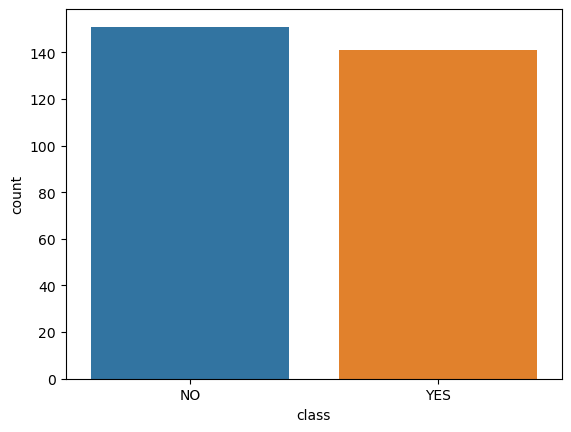

In [140]:
sns.countplot(x="class", data=autism_df)
plt.show()

There is a slight difference between NO and YES under the target variable 'class' suggesting that the data does not have a strong class inbalance. The class variable is wether or not the child has Autism traits.

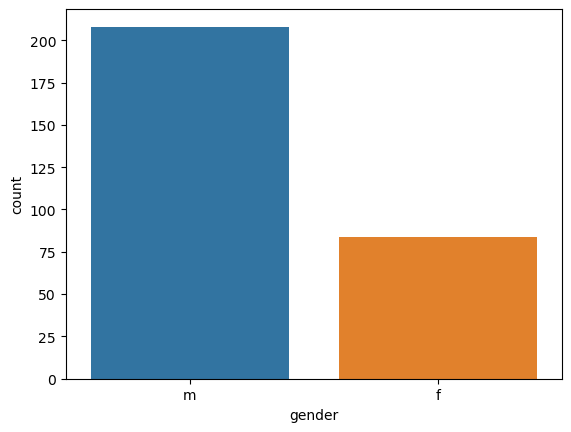

In [141]:
sns.countplot(x="gender", data=autism_df)
plt.show()

There is a significant difference between both genders. Male is significantly higher than female. 

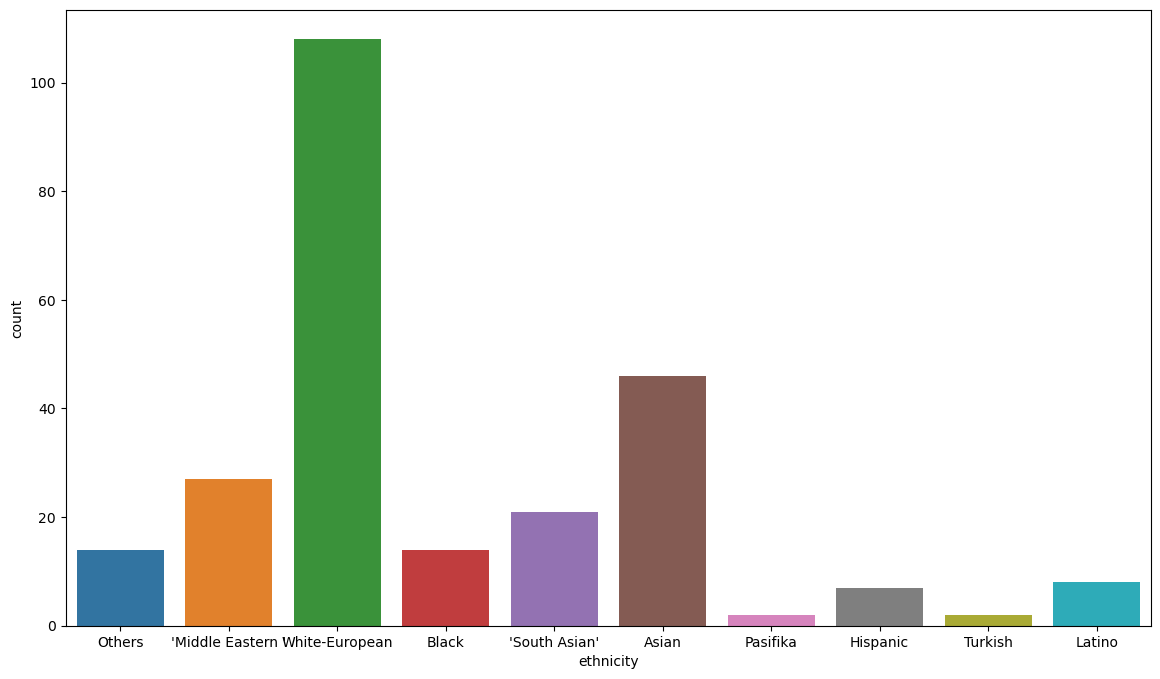

In [142]:
plt.figure(figsize=(14, 8))
sns.countplot(x="ethnicity", data=autism_df)
plt.show()

The ethnicity White-European is significantly higher than the other ethnicities, followed by Asian and Middle Eastern. 

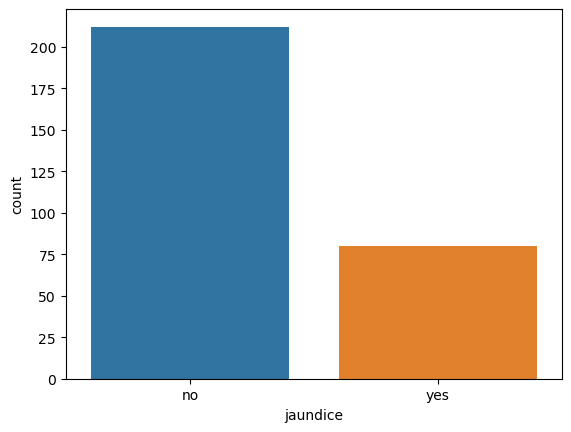

In [143]:
sns.countplot(x="jaundice", data=autism_df)
plt.show()

There are more children without jaundice in the data set than there are with jaundice.

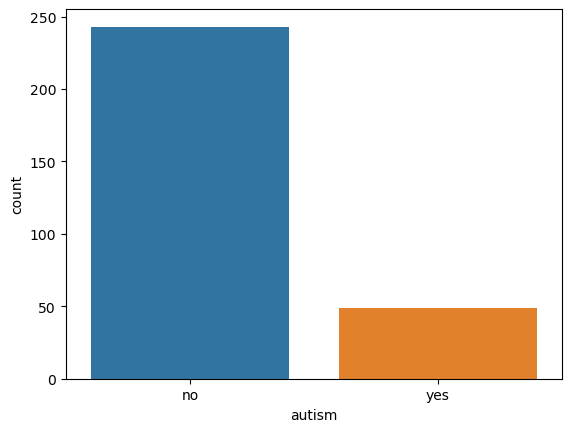

In [144]:
sns.countplot(x="autism", data=autism_df)
plt.show()

There are significantly less children with family members with autism history than there are with autism history. 

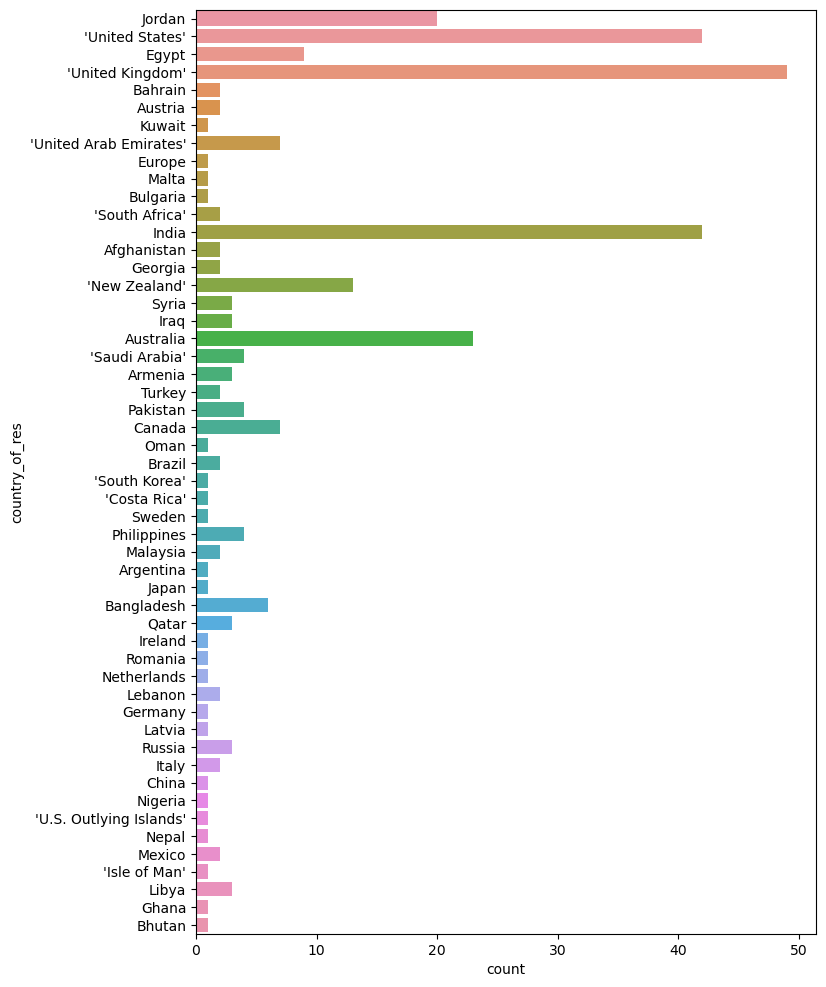

In [145]:
plt.figure(figsize=(8, 12))
sns.countplot(y="country_of_res", data=autism_df)
plt.show()

United Kingdom has the highest number of counts while United States and India follow closely behind. Autralia and Jordan follow in fourth and fifth place. 

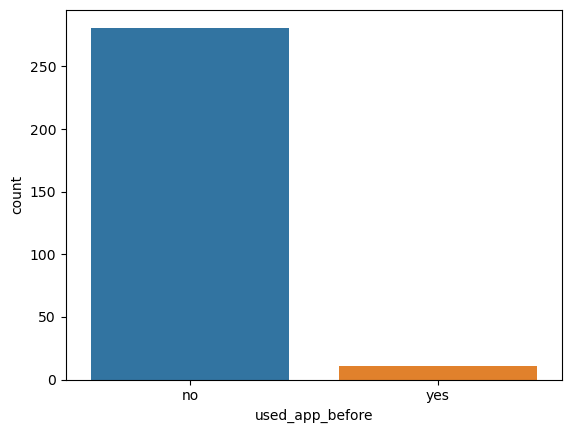

In [146]:
sns.countplot(x="used_app_before", data=autism_df)
plt.show()

Significantly less people have used the app before than those who have. 

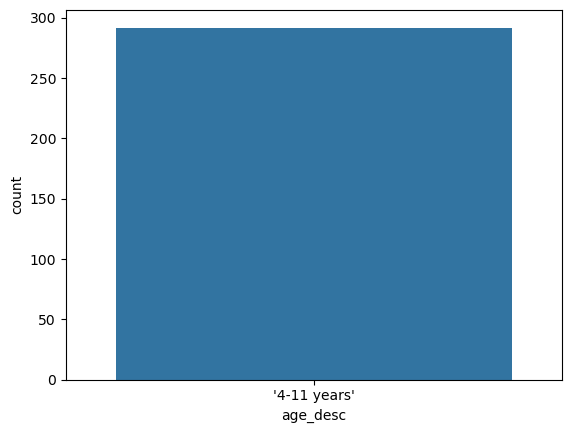

In [150]:
sns.countplot(x="age_desc", data=autism_df)
plt.show()

All children in the data set are between the ages of 4 and 11.

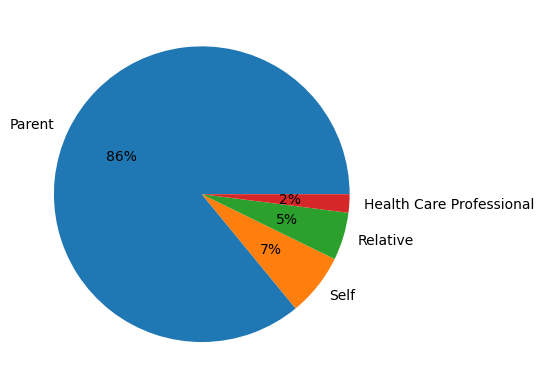

In [151]:
# Capitalize first letter for consistency
autism_df['relation'] = autism_df['relation'].str.capitalize()

plt.pie(autism_df.relation.value_counts(), labels=['Parent', 'Self', 'Relative', 'Health Care Professional'], autopct='%.0f%%')
plt.show()

Under the relation variable, Parent has the most counts with 86% of them while Self, Relative, and Health Care Professional account for only 14%. Meaning that parents are most likely the ones who took the questionaire for the child. 

# Descriptive Statistics

Descriptive statistics of numerical variables are shown below. We have only provided 

1. Count
2. Mean
3. Standard Deviation
4. Minimum
5. Q1
6. Q3
7. Maximum

In [156]:
autism_df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,age_scaled,result_scaled
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,288.000000,292.000000,288.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.354167,6.239726,0.336310,0.623973
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.365456,2.284882,0.337922,0.228488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.500000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.285714,0.600000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,8.000000,0.571429,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,10.000000,1.000000,1.000000


# Descriptive Statistics by class

In [101]:
class_grouped = autism_df.groupby('class')
descriptive_by_class = class_grouped.describe()
descriptive_by_class

A1_Score                                              A2_Score  \
         count      mean       std  min  25%  50%  75%  max    count   
class                                                                  
NO       151.0  0.450331  0.499183  0.0  0.0  0.0  1.0  1.0    151.0   
YES      141.0  0.829787  0.377159  0.0  1.0  1.0  1.0  1.0    141.0   

                 ...  age       result                                     \
           mean  ...  75%   max  count      mean       std  min  25%  50%   
class            ...                                                        
NO     0.423841  ...  8.0  11.0  151.0  4.397351  1.423983  0.0  4.0  5.0   
YES    0.652482  ...  8.5  11.0  141.0  8.212766  1.047504  7.0  7.0  8.0   

                  
       75%   max  
class             
NO     6.0   6.0  
YES    9.0  10.0  

[2 rows x 96 columns]

# Data Visualization

## Box Plots for Numerical Variables

<Axes: >

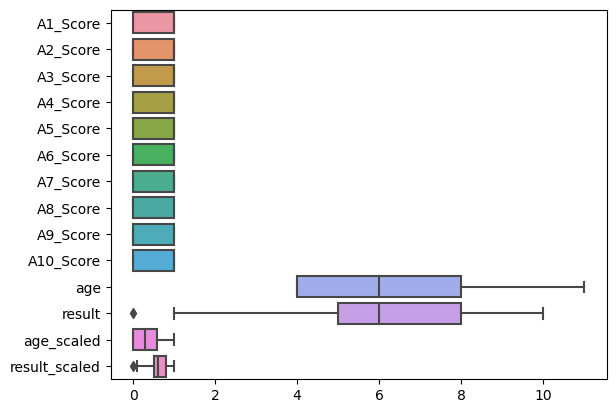

In [155]:
sns.boxplot(data=autism_df, orient="h")

Here we can observe that A1_Score to A10_Score are binary and don't have meaningful variability. We can also observe that age is a continuous variable and is spread across a range. Result is more dispersed which means it has a wider range of values, however, the diamond marker indicated that there is an outlier. age_scaled and result_scaled are normalized to a range of 0 and 1. 

# Histogram for Numerical Variables

array([[<Axes: title={'center': 'A1_Score'}>,
        <Axes: title={'center': 'A2_Score'}>,
        <Axes: title={'center': 'A3_Score'}>,
        <Axes: title={'center': 'A4_Score'}>],
       [<Axes: title={'center': 'A5_Score'}>,
        <Axes: title={'center': 'A6_Score'}>,
        <Axes: title={'center': 'A7_Score'}>,
        <Axes: title={'center': 'A8_Score'}>],
       [<Axes: title={'center': 'A9_Score'}>,
        <Axes: title={'center': 'A10_Score'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'result'}>],
       [<Axes: title={'center': 'age_scaled'}>,
        <Axes: title={'center': 'result_scaled'}>, <Axes: >, <Axes: >]],
      dtype=object)

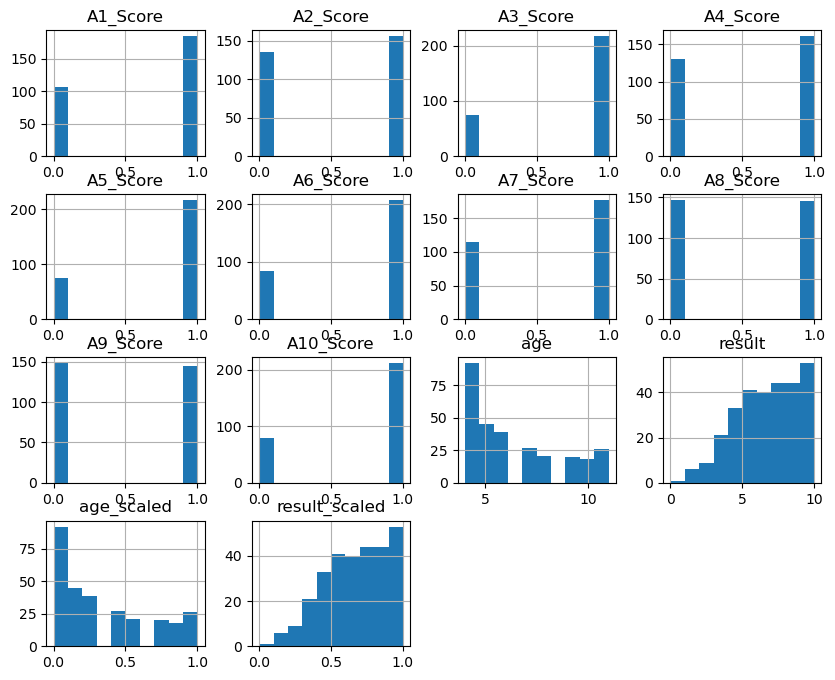

In [154]:
autism_df.hist(figsize=(10, 8))

Here we can see that A1_Score to A10_Score are either 0 or 1 and do not need scaling since they are standardized. Age is positively skewed which means that younger ages are more frequent than other ages. Result is also positively skewed which means that lower results are less frequent than higher results. age_scaled and result_scaled remain positively skewed just as before the Min-Max scaling. 

# QQ Plots for Numerical Variables

<Figure size 640x480 with 0 Axes>

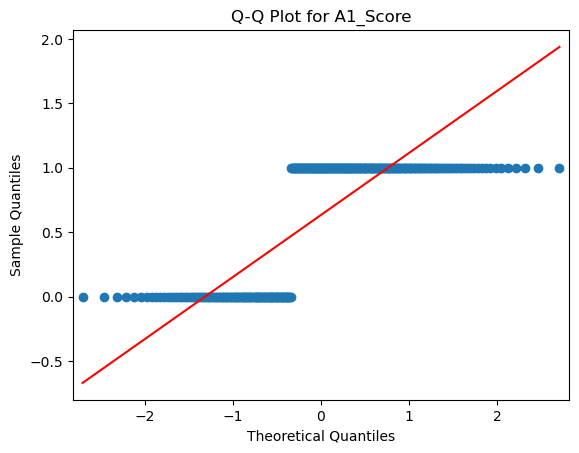

<Figure size 640x480 with 0 Axes>

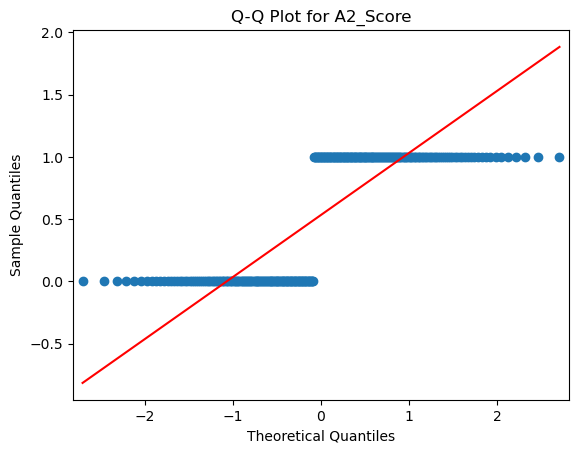

<Figure size 640x480 with 0 Axes>

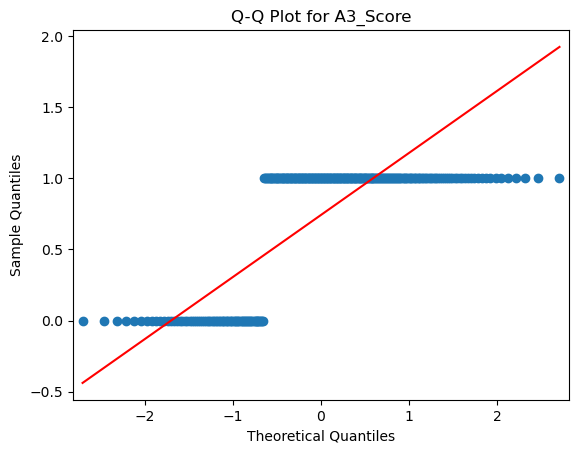

<Figure size 640x480 with 0 Axes>

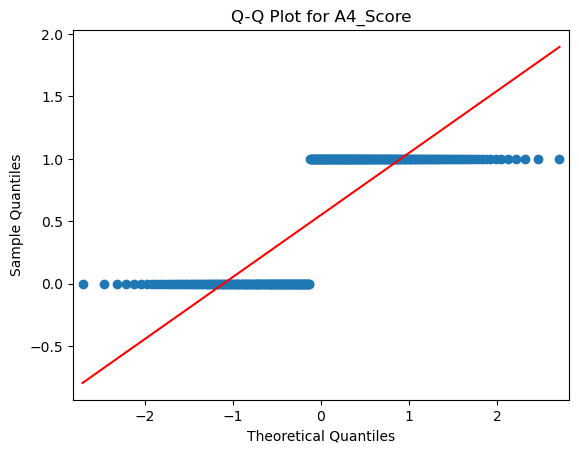

<Figure size 640x480 with 0 Axes>

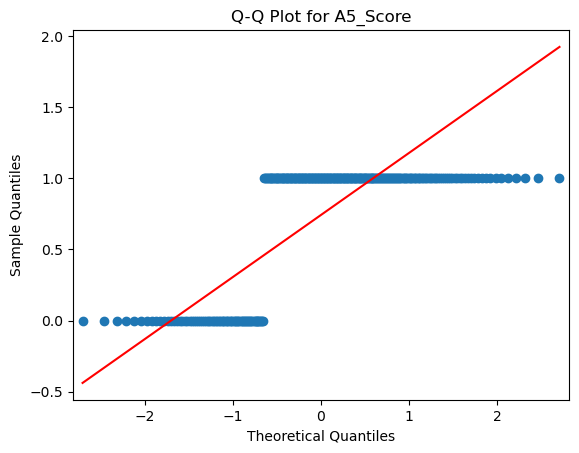

<Figure size 640x480 with 0 Axes>

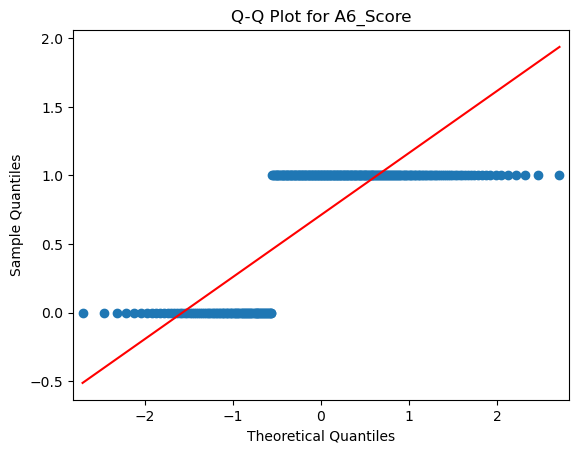

<Figure size 640x480 with 0 Axes>

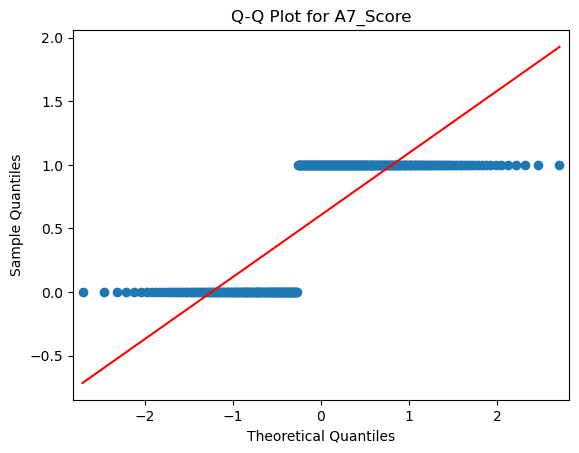

<Figure size 640x480 with 0 Axes>

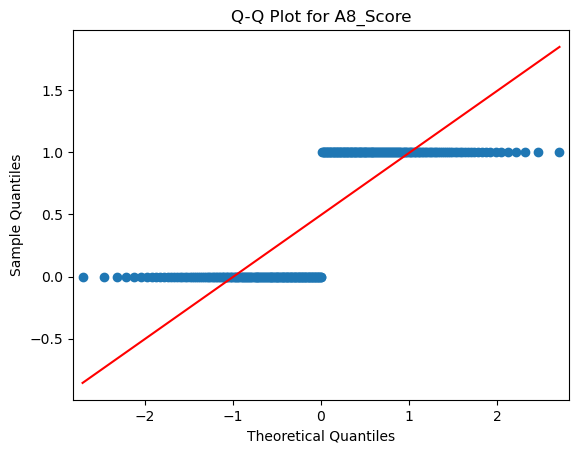

<Figure size 640x480 with 0 Axes>

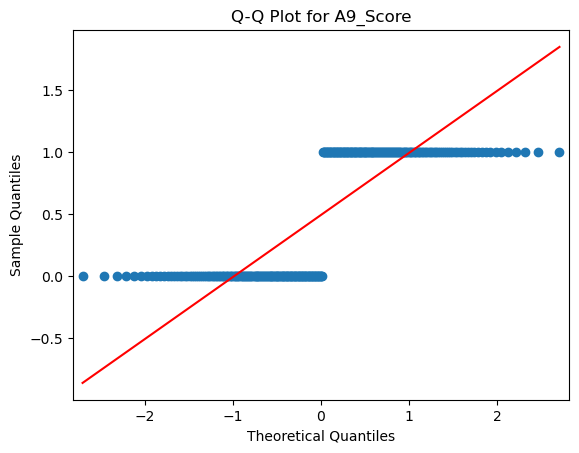

<Figure size 640x480 with 0 Axes>

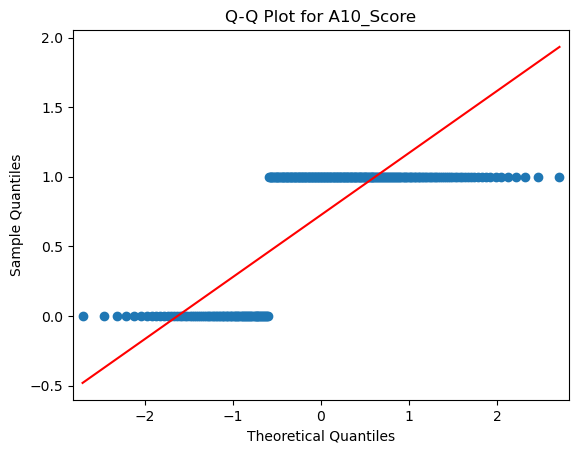

<Figure size 640x480 with 0 Axes>

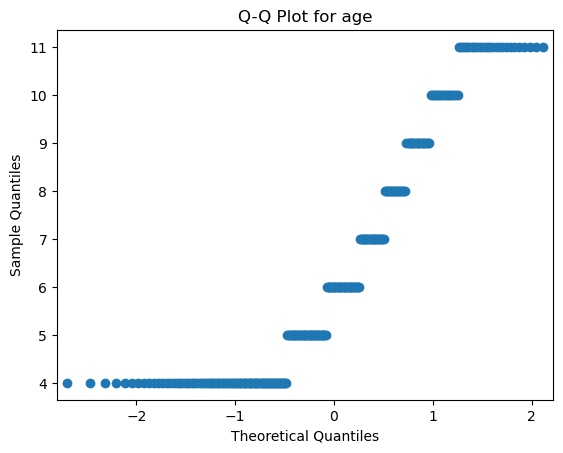

<Figure size 640x480 with 0 Axes>

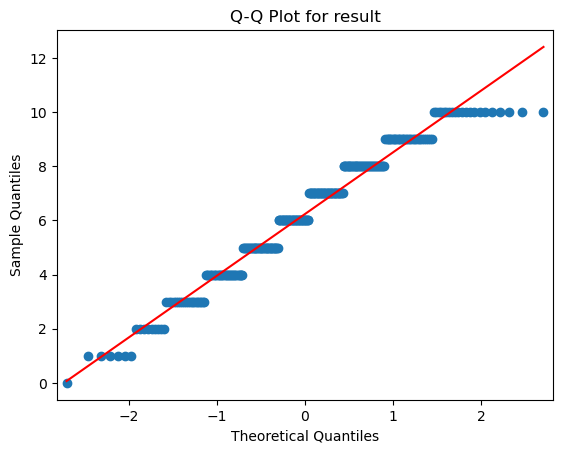

<Figure size 640x480 with 0 Axes>

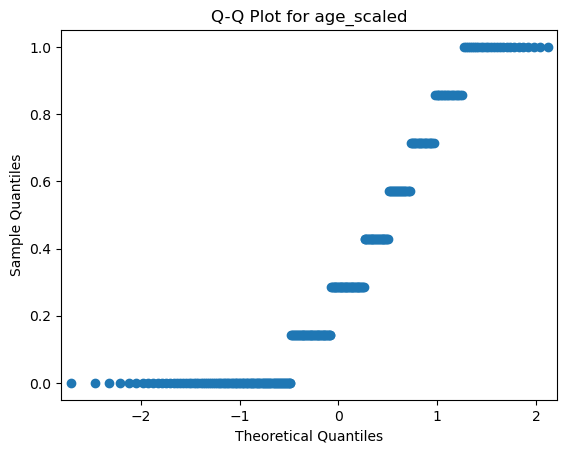

<Figure size 640x480 with 0 Axes>

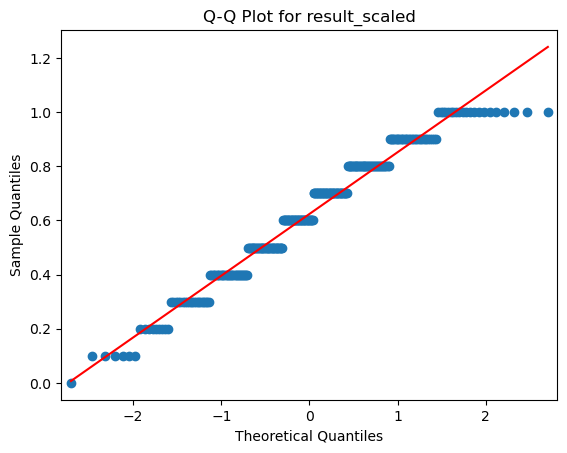

In [167]:
# Select only numerical columns (int64 and float64)
numerical_features = autism_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Generate Q-Q plots for all numerical variables
for feature in numerical_features:
    plt.figure()
    sm.qqplot(autism_df[feature], line='s')  # No need to copy the entire dataset
    plt.title(f'Q-Q Plot for {feature}')
    plt.show()


Since A1_Score to A10_Score are not normally distributed. 
Age and age_scaled take on discrete values as you can see on the distinct steps formed and also does not follow a normal distribution. 
Result and result_scaled also have distinct steps meaning that the variable has non_continuous values. The red lines however, shows that the data follows some normal distribution. 

# Density Plots for Numerical Variables

<Axes: ylabel='Density'>

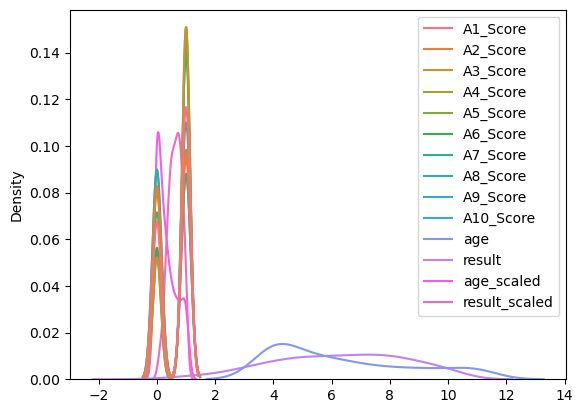

In [153]:
sns.kdeplot(data=autism_df)

Here we can observe that A1_Score to A10_Score create sharp peaks at 0 and 1. age and result are right skewed as we saw in the histogram. Then we can see that age_scaled and result_scaled now range between 0 and 1.

# Bivariate Analysis

## Boxplots by class

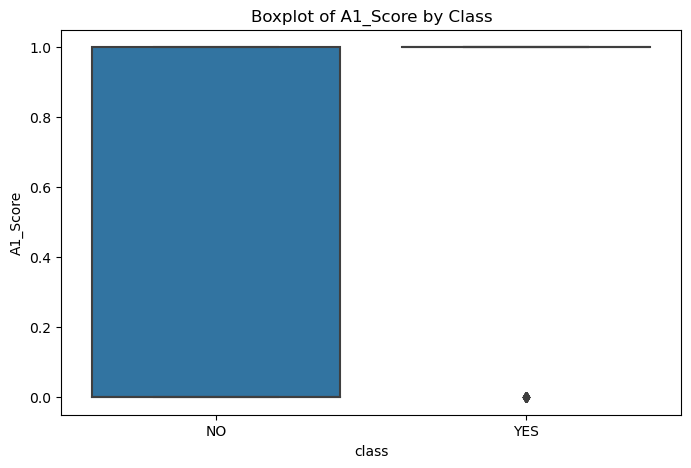

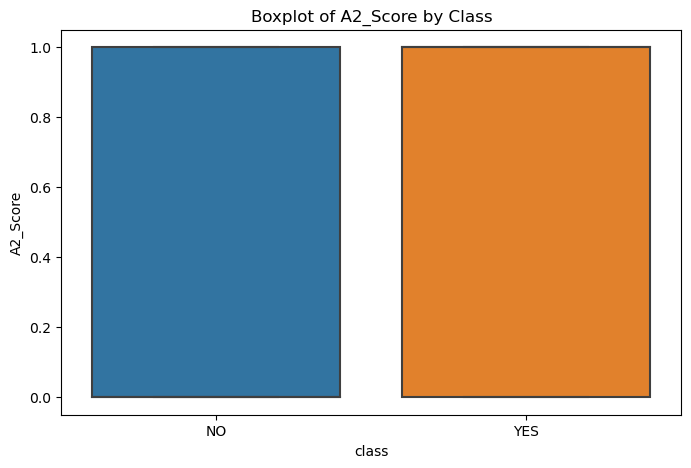

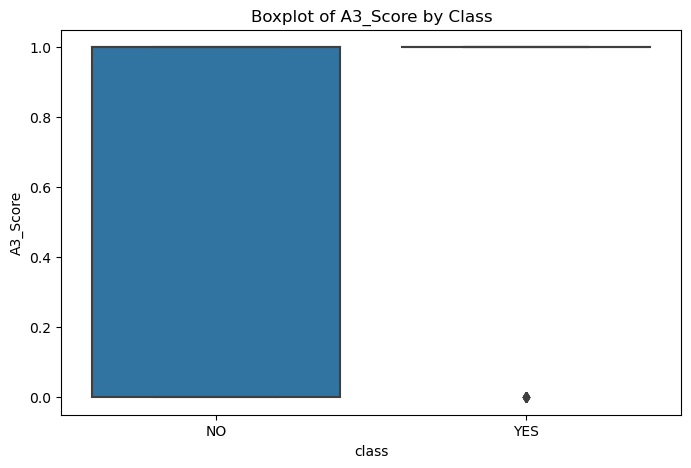

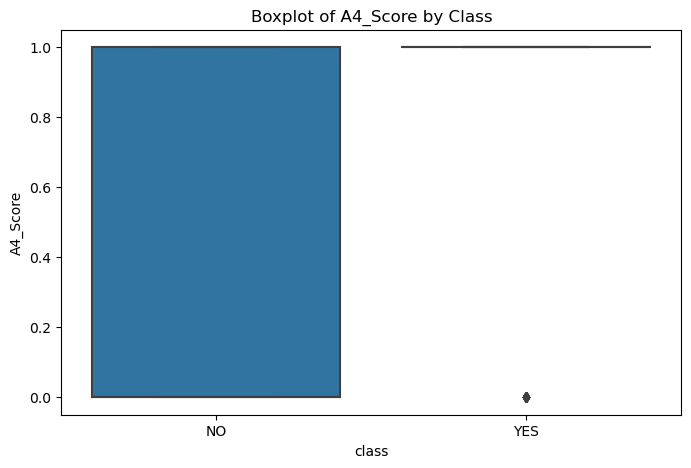

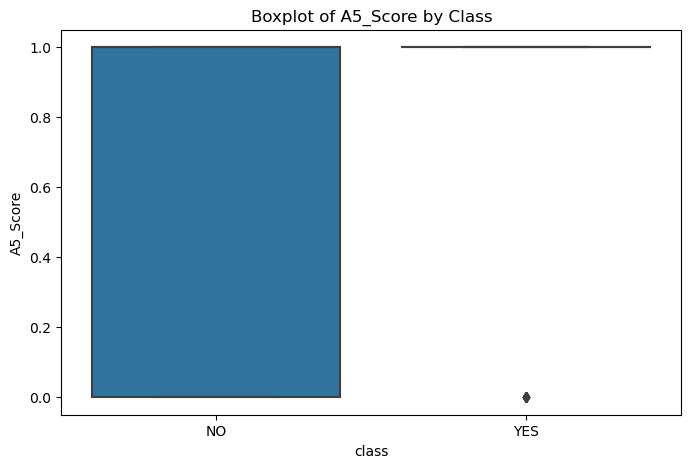

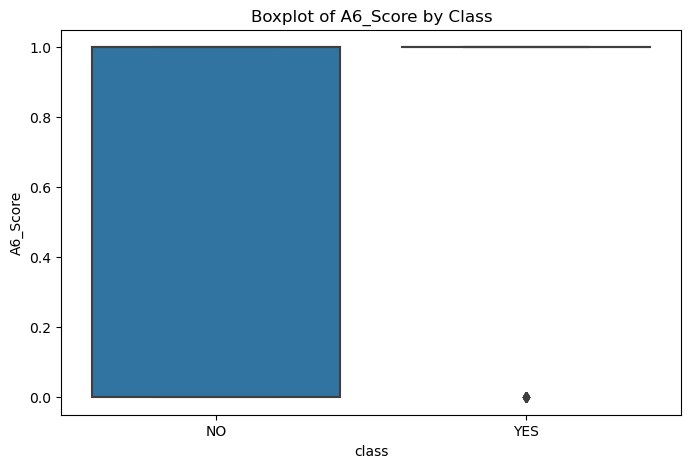

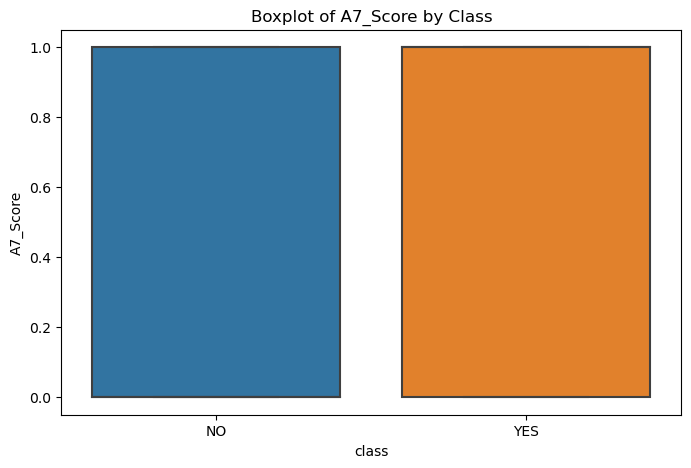

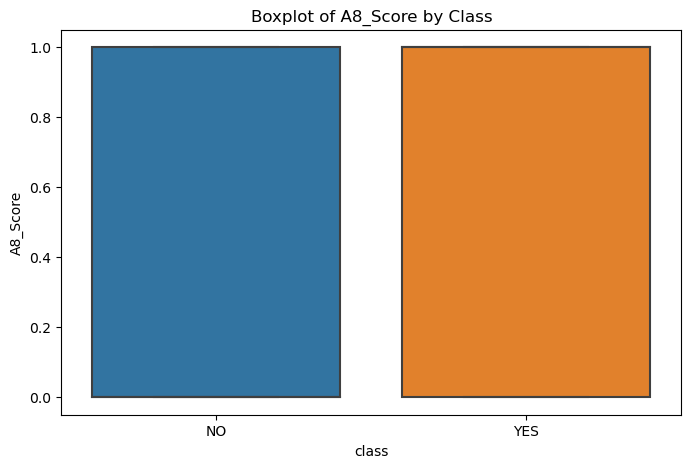

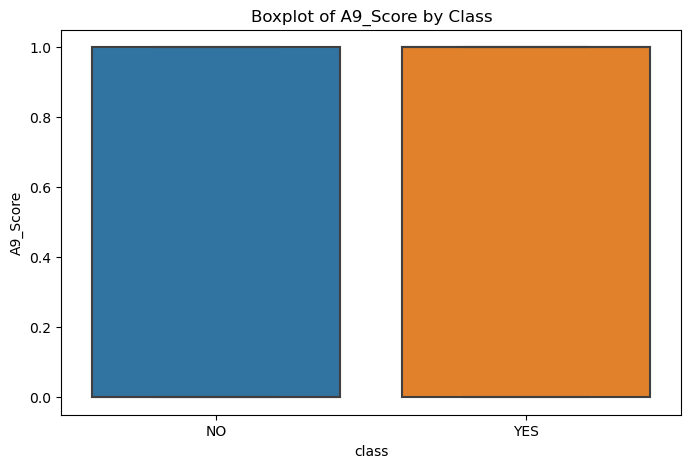

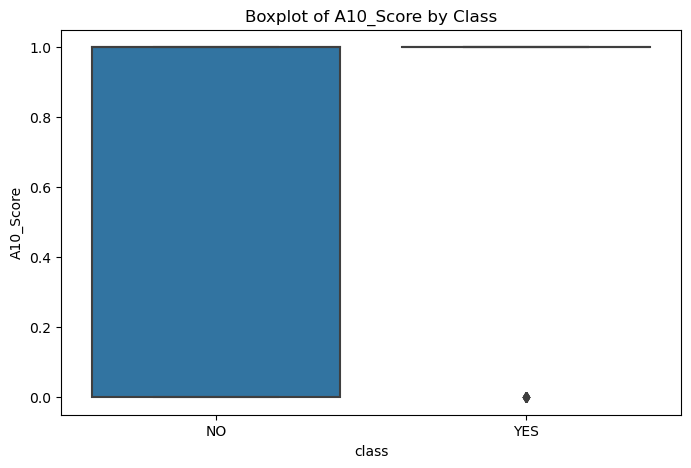

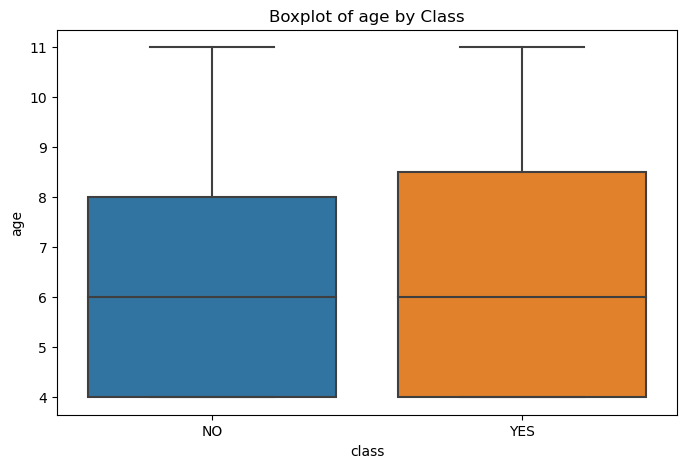

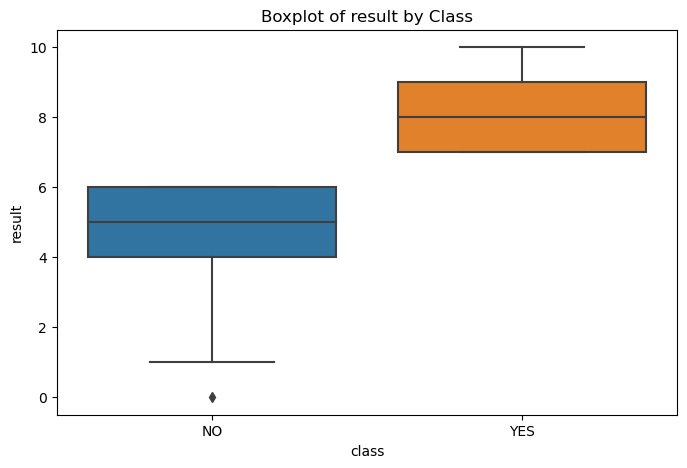

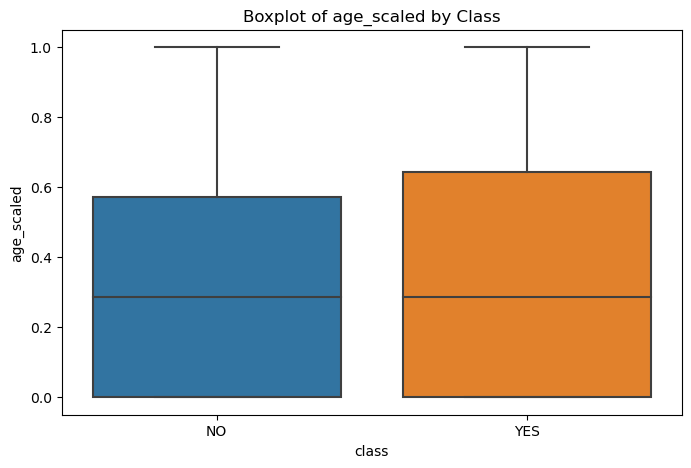

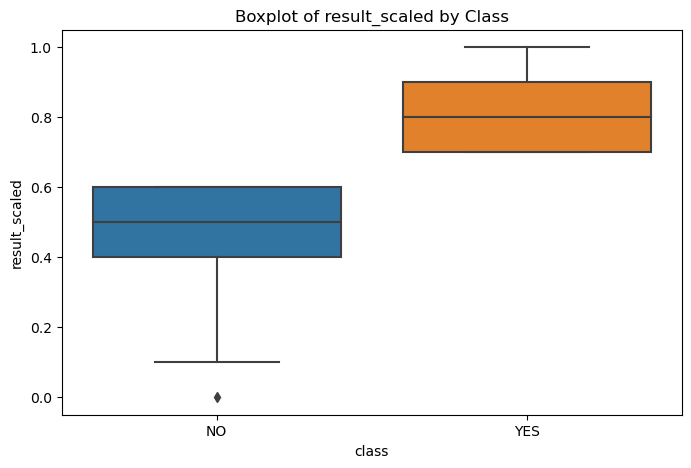

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select all numerical columns excluding 'class'
numerical_features = autism_df.select_dtypes(include=['int64', 'float64']).columns

# Generate boxplots for all numerical features grouped by 'class'
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="class", y=feature, data=autism_df)
    plt.title(f"Boxplot of {feature} by Class")
    plt.show()


Boxplot of A1_Score, A3_Score, A4_Score, A5_Score, A6_Score, and A10_Score: for the No class, values are almost all 1. For the Yes class, values are mainly 1 with some outliers being 0. 

Boxplot of A2_Score, A7_Score, A8_Score, and A9_Score: the distribution of No and Yes are identical which means that answers in both groups are all 1. 

Boxplot of age and age_scaled:The age distribution is almost identical between the two classes. Age alone does not provide meaningful separation between individuals in the NO and YES classes

Boxplot of result and result_scaled: Higher result scores are associated with the YES class, meaning the result variable is a good predictor for classifying individuals.
There is more variability in the NO group, with some individuals having significantly lower scores.The is a presence of an outlier in the NO class. 


# Parid Plots (Scatter plot and Density Plots)

/Users/sandralopez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


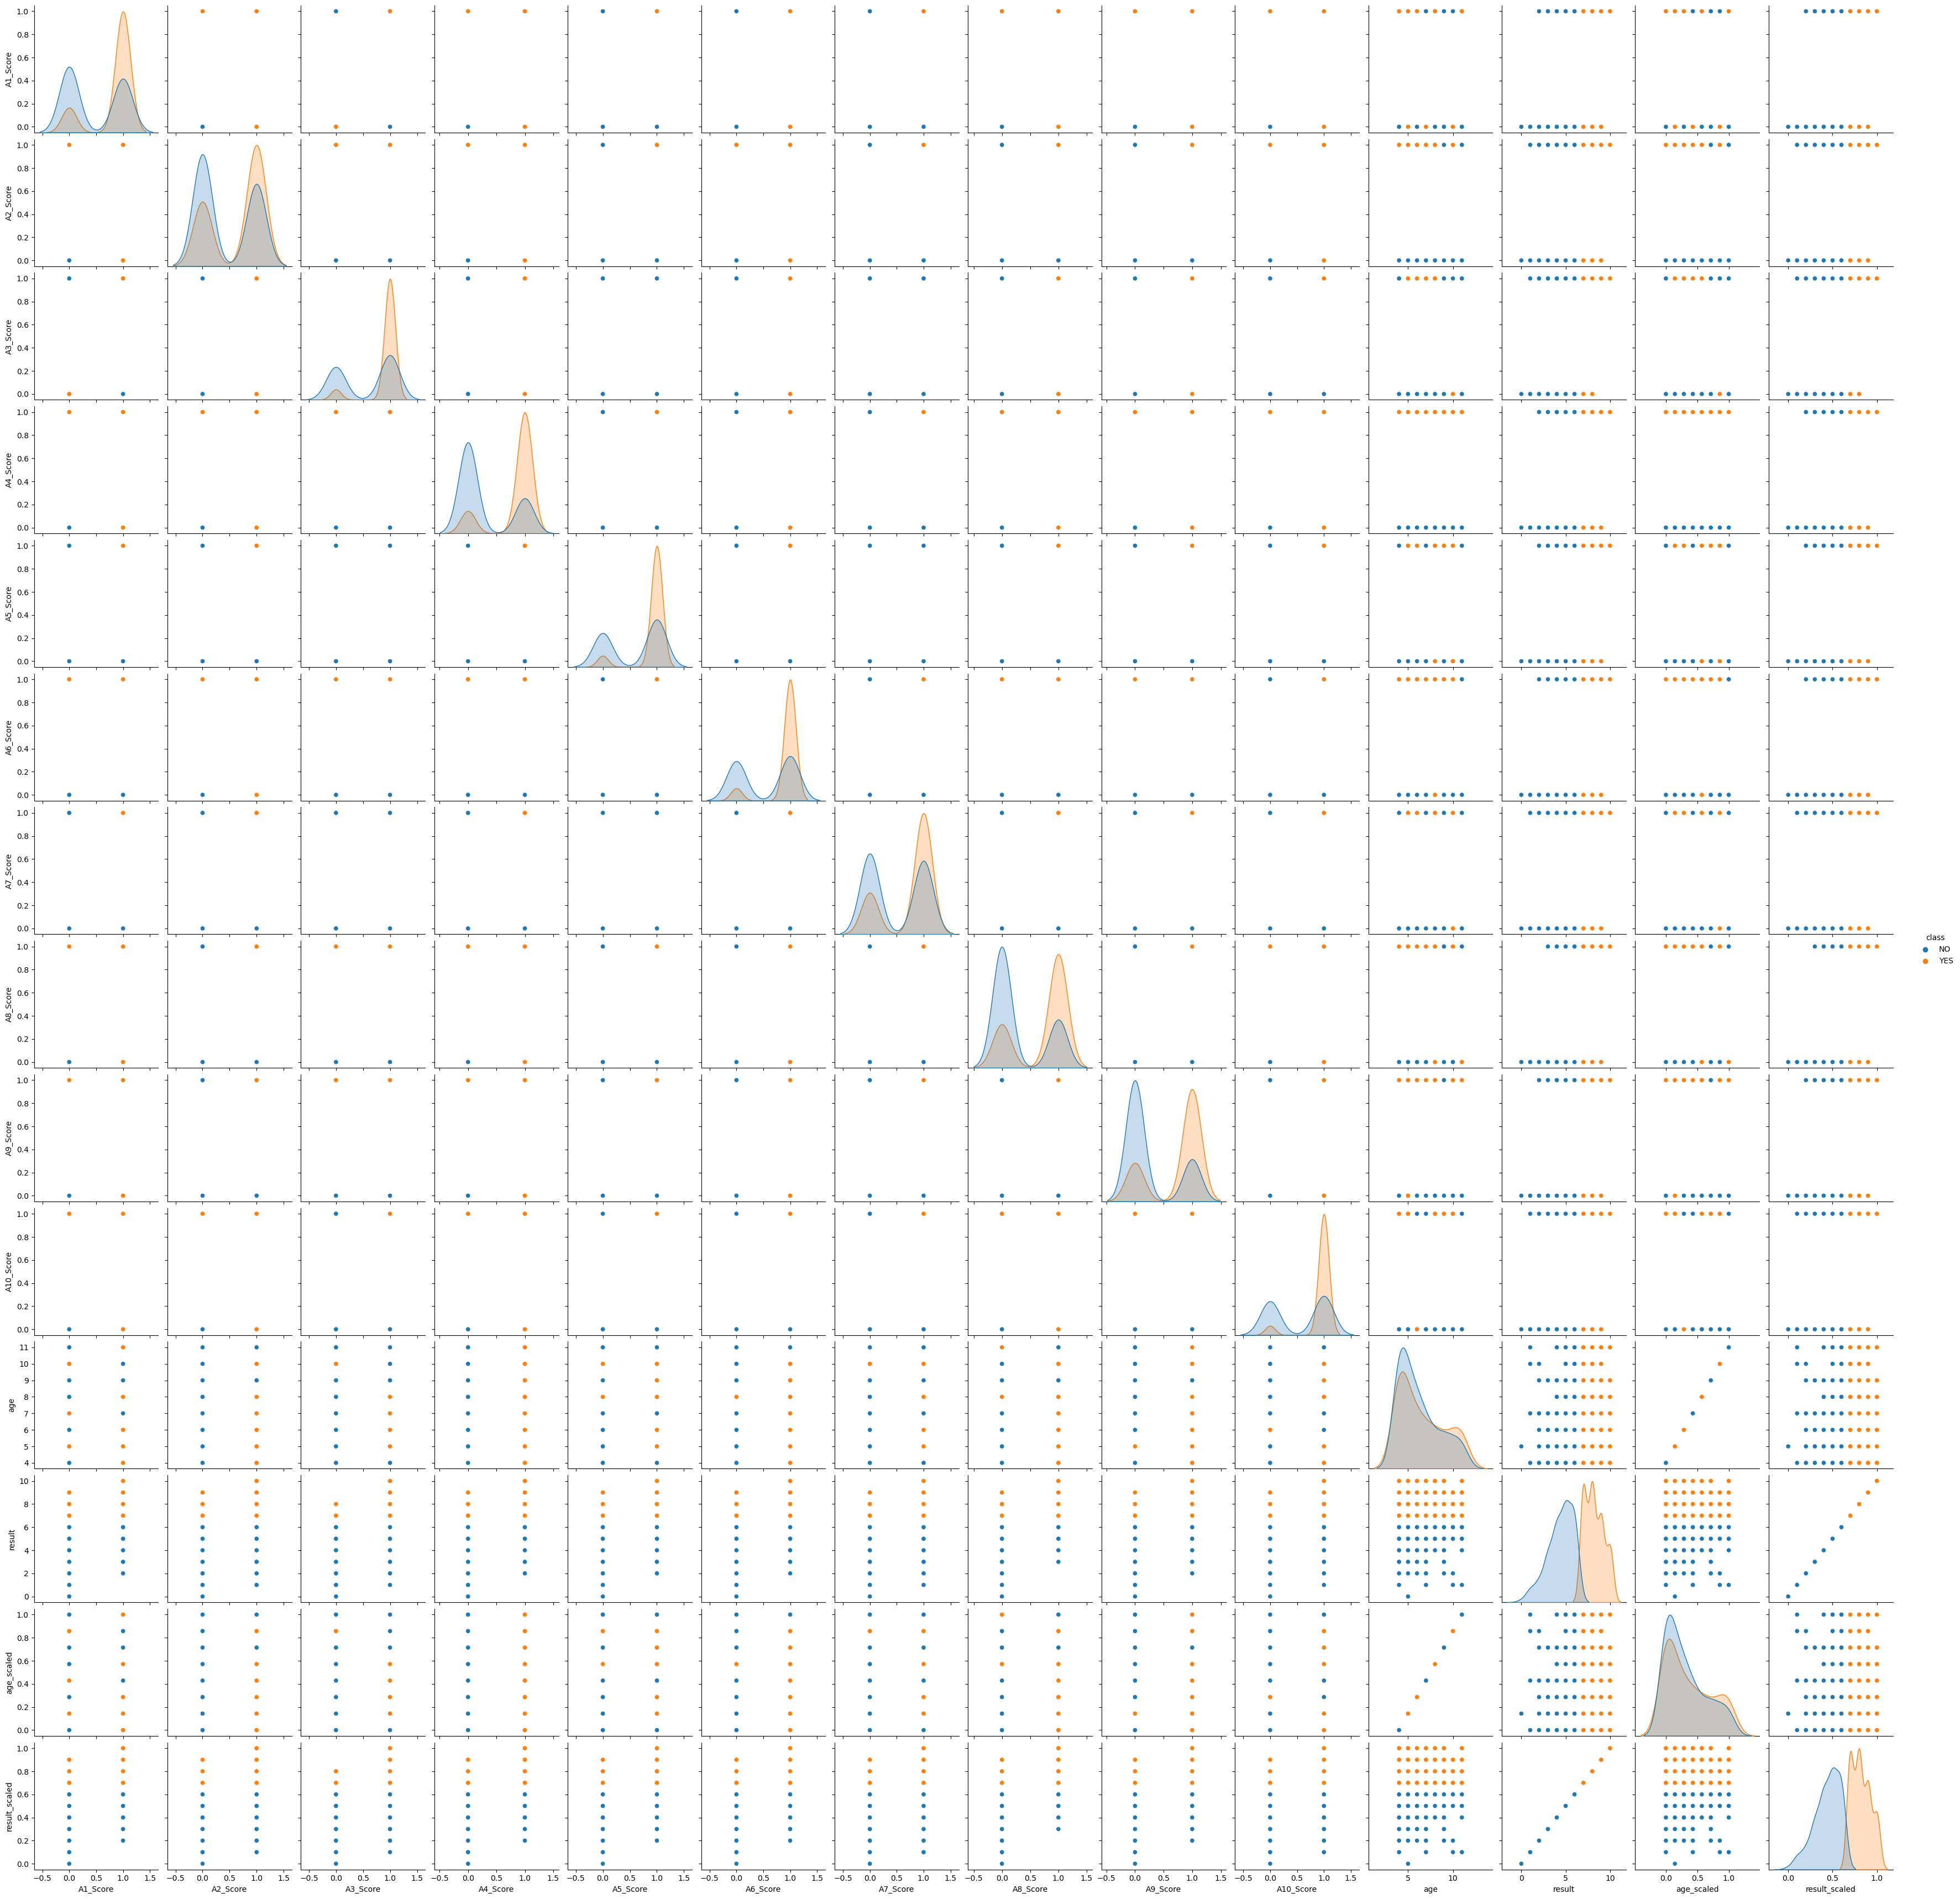

In [163]:
sns.pairplot(autism_df, hue='class')

# Multivariate Analysis

## Correlation Analysis

In [174]:
# Compute correlation only for numerical features
corr_matrix = autism_df.select_dtypes(include=['int64', 'float64']).corr()

# Apply background gradient for visualization
corr_matrix.style.background_gradient(cmap='coolwarm')

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,age_scaled,result_scaled
A1_Score,1.000000,0.030840,0.073486,0.271476,0.154828,0.113350,0.027051,0.058761,0.153071,0.106534,0.101390,0.416461,0.101390,0.416461
A2_Score,0.030840,1.000000,0.111075,0.124046,-0.046066,0.134627,0.020211,0.021067,0.083334,0.072961,-0.045817,0.332901,-0.045817,0.332901
A3_Score,0.073486,0.111075,1.000000,0.273490,0.138802,0.232463,0.007417,0.191943,0.250645,0.148550,-0.140640,0.491354,-0.140640,0.491354
A4_Score,0.271476,0.124046,0.273490,1.000000,0.115884,0.354650,0.019836,0.289916,0.338849,0.125205,0.170580,0.614034,0.170580,0.614034
A5_Score,0.154828,-0.046066,0.138802,0.115884,1.000000,0.180515,0.183891,0.144910,0.078179,0.254003,-0.069615,0.439806,-0.069615,0.439806
A6_Score,0.113350,0.134627,0.232463,0.354650,0.180515,1.000000,-0.047724,0.298268,0.278804,0.254210,0.043490,0.574248,0.043490,0.574248
A7_Score,0.027051,0.020211,0.007417,0.019836,0.183891,-0.047724,1.000000,0.155693,0.220280,0.039182,0.123534,0.345910,0.123534,0.345910
A8_Score,0.058761,0.021067,0.191943,0.289916,0.144910,0.298268,0.155693,1.000000,0.212260,0.149370,0.052083,0.532230,0.052083,0.532230
A9_Score,0.153071,0.083334,0.250645,0.338849,0.078179,0.278804,0.220280,0.212260,1.000000,0.191249,0.092211,0.593050,0.092211,0.593050
A10_Score,0.106534,0.072961,0.148550,0.125205,0.254003,0.254210,0.039182,0.149370,0.191249,1.000000,0.035157,0.471898,0.035157,0.471898


A4_Score, A6_Score, and A9_Score have a strong influences on result and result_scaled.
Age shows very little correlation with A1_Score to A10_score variables. 
There is almost no relation between age and result. 


In [177]:
# Select only numerical columns
numerical_df = autism_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation within each class group
corr_by_class = numerical_df.groupby(autism_df['class']).corr()

# Display correlation matrix with a background gradient
corr_by_class.style.background_gradient(cmap='coolwarm')

NO:
A6_Score and result and result_scaled have a strog correlation.
Yes:
Result and result_scaled are strongly correlated to A9_Score

# PCA Analysis: PCA Biplot

In [179]:
!pip install pca
from pca import pca

  Obtaining dependency information for pca from https://files.pythonhosted.org/packages/95/be/619a8860b6cd103d558feb73a8797ed6e3e838077486b987d7e8c1bf9fe4/pca-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for datazets from https://files.pythonhosted.org/packages/44/71/b7012dee713198a598c836da8c446792ab39235714a389ac4db2417a6bca/datazets-1.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for colourmap>=1.1.19 from https://files.pythonhosted.org/packages/a2/a3/a6467450929daf8c42f3a88c13145ba7160651e0bd14586ed972d8482f4d/colourmap-1.1.19-py3-none-any.whl.metadata
  Obtaining dependency information for scatterd>=1.3.7 from https://files.pythonhosted.org/packages/6a/a9/76be12419fe5475ac69fa9856e1a33df2a73c11bf2fa4a2365b0fa12f371/scatterd-1.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for adjusttext from https://files.pythonhosted.org/packages/53/1c/8feedd607cc14c5df9aef74fe3af9a99bf660743b842a9b5b1865326b4aa/adjustText-1.3.0-py3-none-

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [81] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [19] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [81] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[19]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '19 Principal Components explain [95.72%] of the variance'}, xlabel='PC1 (40.2% expl.var)', ylabel='PC2 (33.9% expl.var)'>)

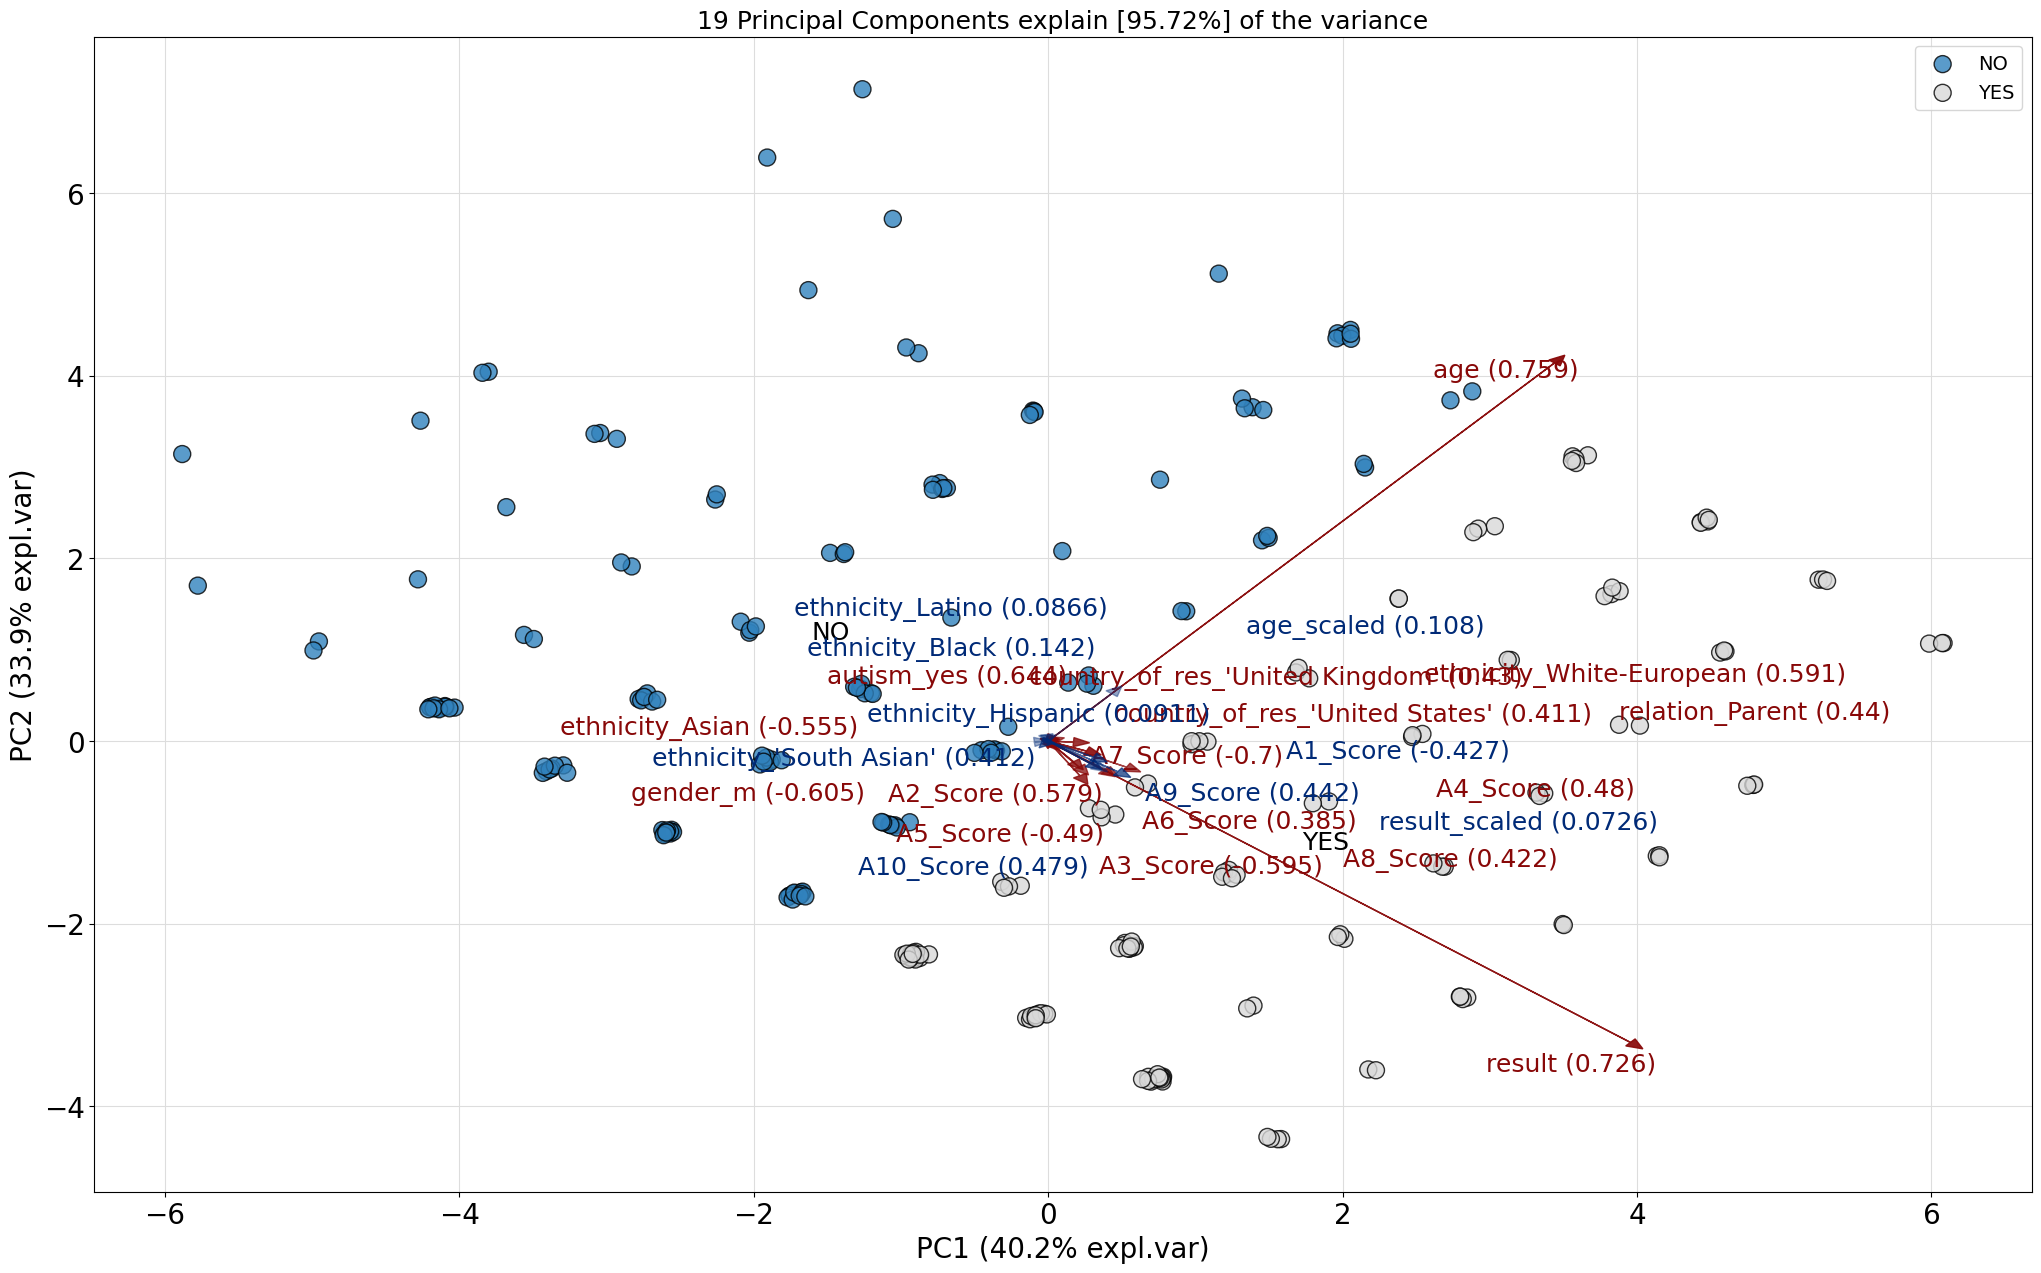

In [187]:

from sklearn.impute import SimpleImputer

# Drop 'class' (target variable)
X = autism_df.drop('class', axis=1)

# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)  

# Handle missing values by replacing NaNs with the column mean
imputer = SimpleImputer(strategy="mean")
X_encoded[:] = imputer.fit_transform(X_encoded)

# Initialize PCA model
pca_model = pca()

# Fit and transform PCA
pca_model.fit_transform(X=X_encoded, row_labels=autism_df['class'])

# Generate the PCA biplot
pca_model.biplot()



pca_model = pca()
pca_model.fit_transform(X=autism_df.drop('class',axis=1), row_labels=autism_df.class, )
pca_model.biplot()

# Kmeans Clustering

/Users/sandralopez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


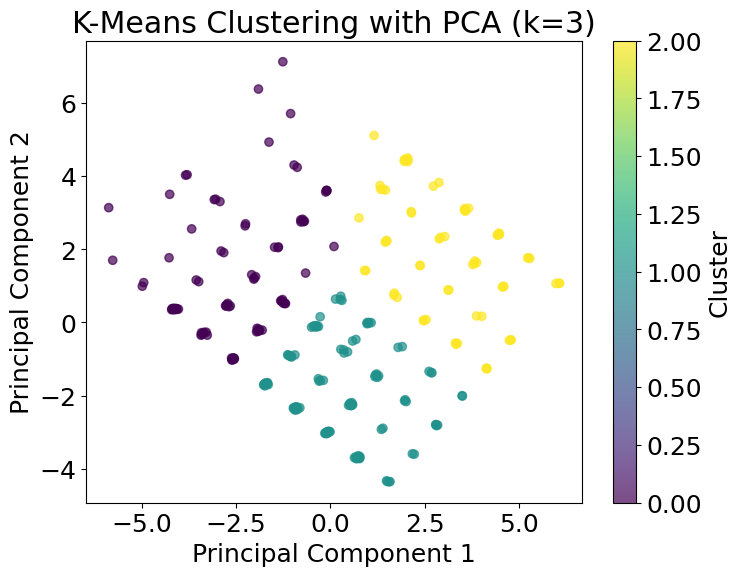

In [198]:

# Ensure all data is numeric
X = autism_df.drop('class', axis=1)  # Drop the target variable
X_encoded = pd.get_dummies(X, drop_first=True)  # Convert categorical to numeric

# Handle missing values (replace NaN with column mean)
imputer = SimpleImputer(strategy="mean")
X_encoded[:] = imputer.fit_transform(X_encoded)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X_encoded)

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with PCA (k=3)")
plt.colorbar(label="Cluster")
plt.show()

